# Supervised Learning - Project

In this Project, we are going to perform a full unsupervised learning machine learning project on a "Wholesale Data" dataset. The dataset refers to clients of a wholesale distributor. It includes the annual spending in monetary units (m.u.) on diverse product categories

[Kaggle Link](https://www.kaggle.com/datasets/binovi/wholesale-customers-data-set)

# Part I : EDA - Exploratory Data Analysis & Pre-processing

The given dataset seems to be a grocery sales dataset containing information about various products sold by a grocery store. To perform an exploratory data analysis (EDA) on this dataset, we can perform the following tasks:

- Data Import: Import the dataset into a statistical software tool such as Python or R.
- Data Cleaning: Check the dataset for any missing or incorrect data and clean the dataset accordingly. This may involve removing or imputing missing data or correcting any obvious errors.
Data Description: Generate summary statistics such as mean, median, and standard deviation for each column of the dataset. This will help in understanding the distribution of data in each column.
- Data Visualization: Create various visualizations such as histograms, box plots, scatter plots, and heatmaps to understand the relationships and trends between the different variables in the dataset. For example, we can create a scatter plot between the "Fresh" and "Milk" variables to see if there is any correlation between them.
- Outlier Detection: Check for any outliers in the dataset and determine whether they are valid or erroneous data points.
- Correlation Analysis: Calculate the correlation between different variables in the dataset to determine which variables are highly correlated and which ones are not. For example, we can calculate the correlation between "Grocery" and "Detergents_Paper" to see if there is any relationship between these two variables.
- Data Transformation: If necessary, transform the data by standardizing or normalizing the variables to make them comparable across different scales.
- Feature Selection: Identify the most important features or variables that contribute the most to the overall variance in the dataset. This can be done using various feature selection techniques such as principal component analysis (PCA) or random forest regression.

In [24]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Wholesale_Data.csv')

In [15]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [14]:
#Checking for missing data
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


There are no missing data

In [16]:
# understanding the distribution of data in each column
df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


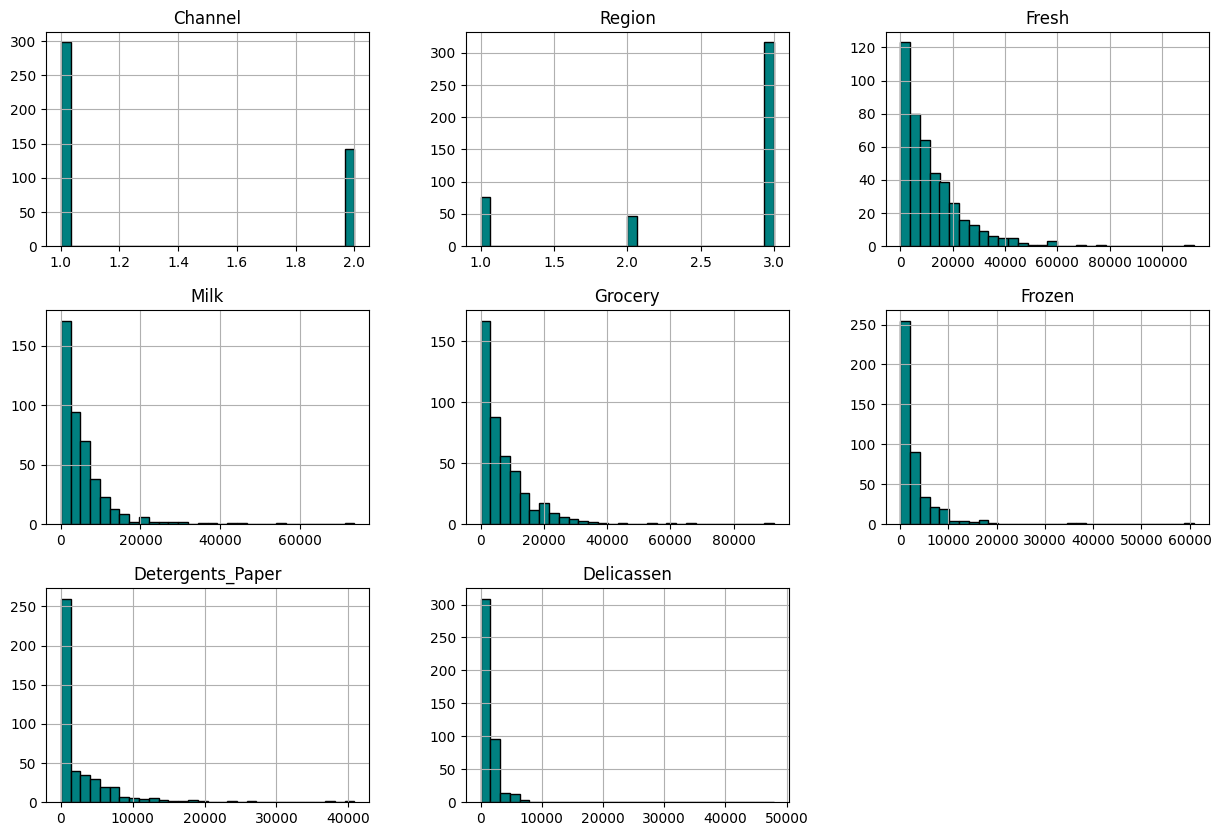

In [20]:
# Distribution of data 

df.hist(bins=30, figsize=(15,10), layout=(3,3), color='teal', edgecolor='black')
plt.show()

We can see with the visualization that the channel and region columns are categorical variables with 2 and 3 categories respectively. The rest of the data are all right skewed with many outliers it would seem visually.

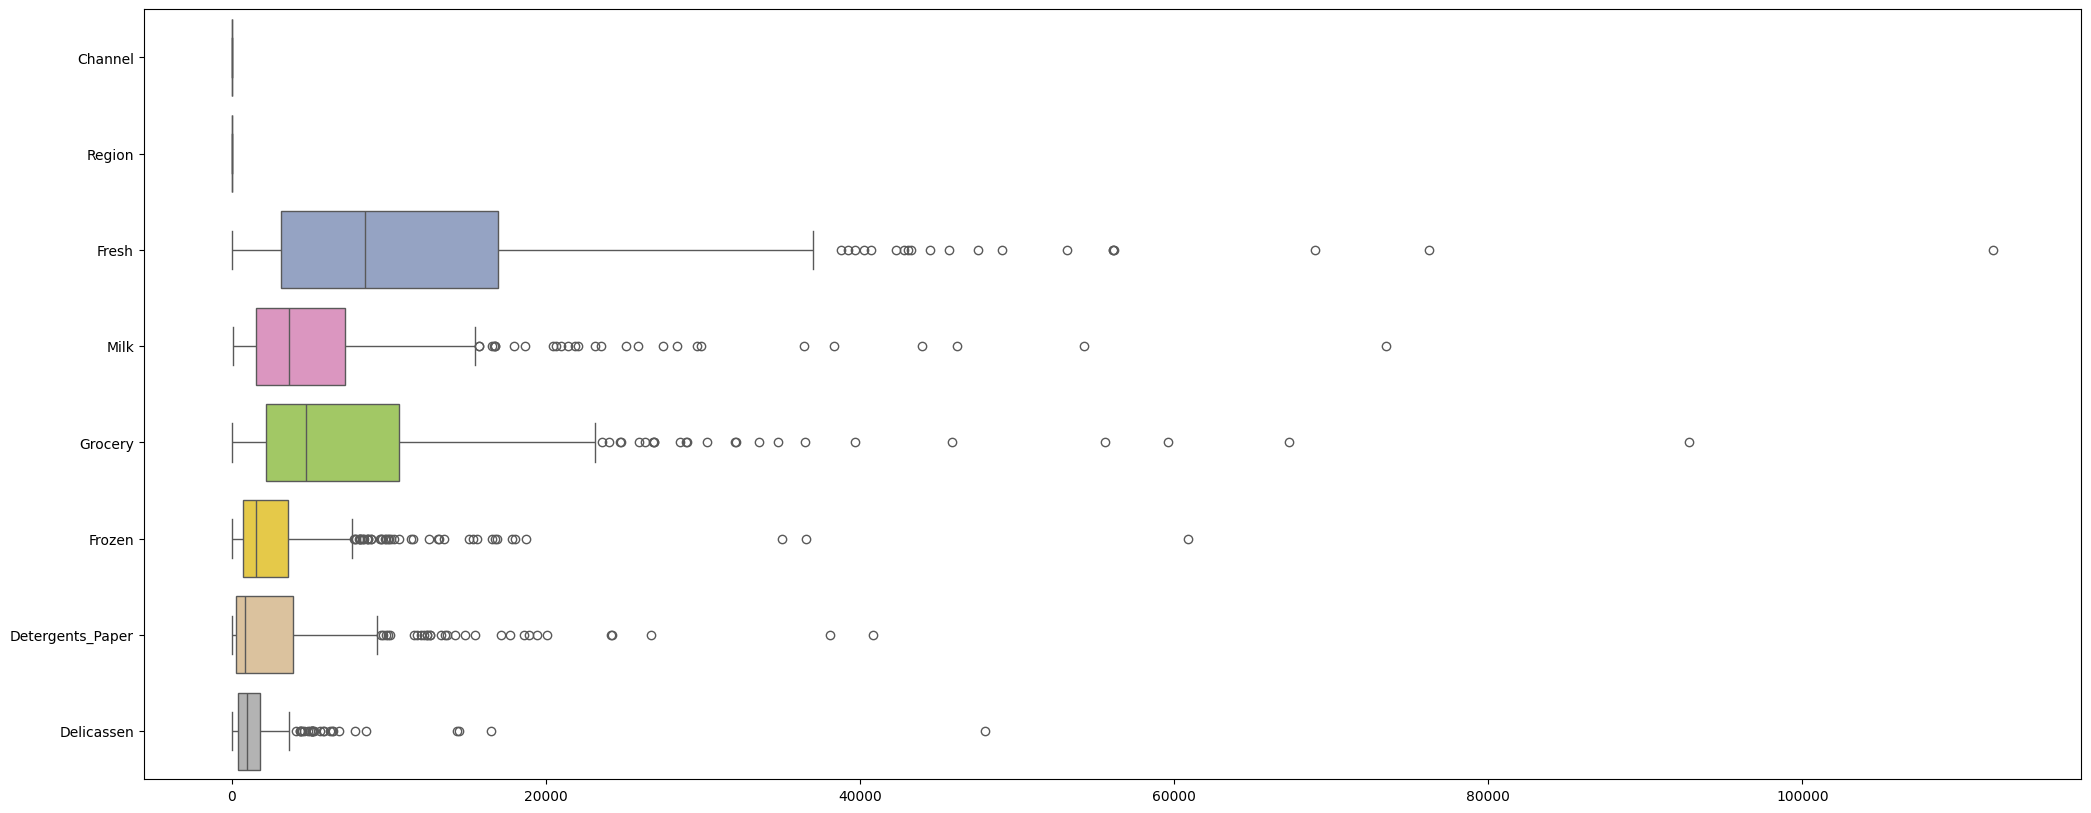

In [21]:
# Using boxplot to visualize outliers  

plt.figure(figsize=(25,10))
sns.boxplot(data=df, orient="h", palette="Set2")
plt.show()

In [38]:
# Counting the number of outliers in each column using IQR

columns = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']

outliers_count = {}

for column in columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    outliers_count[column] = len(outliers)

print(outliers_count)

{'Fresh': 20, 'Milk': 28, 'Grocery': 24, 'Frozen': 43, 'Detergents_Paper': 30, 'Delicassen': 27}


Since there's not that many outliers we will simply drop them from the dataset

In [41]:
# Dropping the rows with the outliers

columns = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']


outlier_indices = set()

for column in columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
   
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)].index
    outlier_indices.update(outliers)

# Drop the rows with outliers
df_no_outliers = df.drop(index=outlier_indices)

# Reset index 
df_no_outliers.reset_index(drop=True, inplace=True)

print("Original dataframe size:", df.shape)
print("New Dataframe size without outliers:", df_no_outliers.shape)

Original dataframe size: (440, 9)
New Dataframe size without outliers: (332, 9)


We have dropped about 25% of our data that were outliers


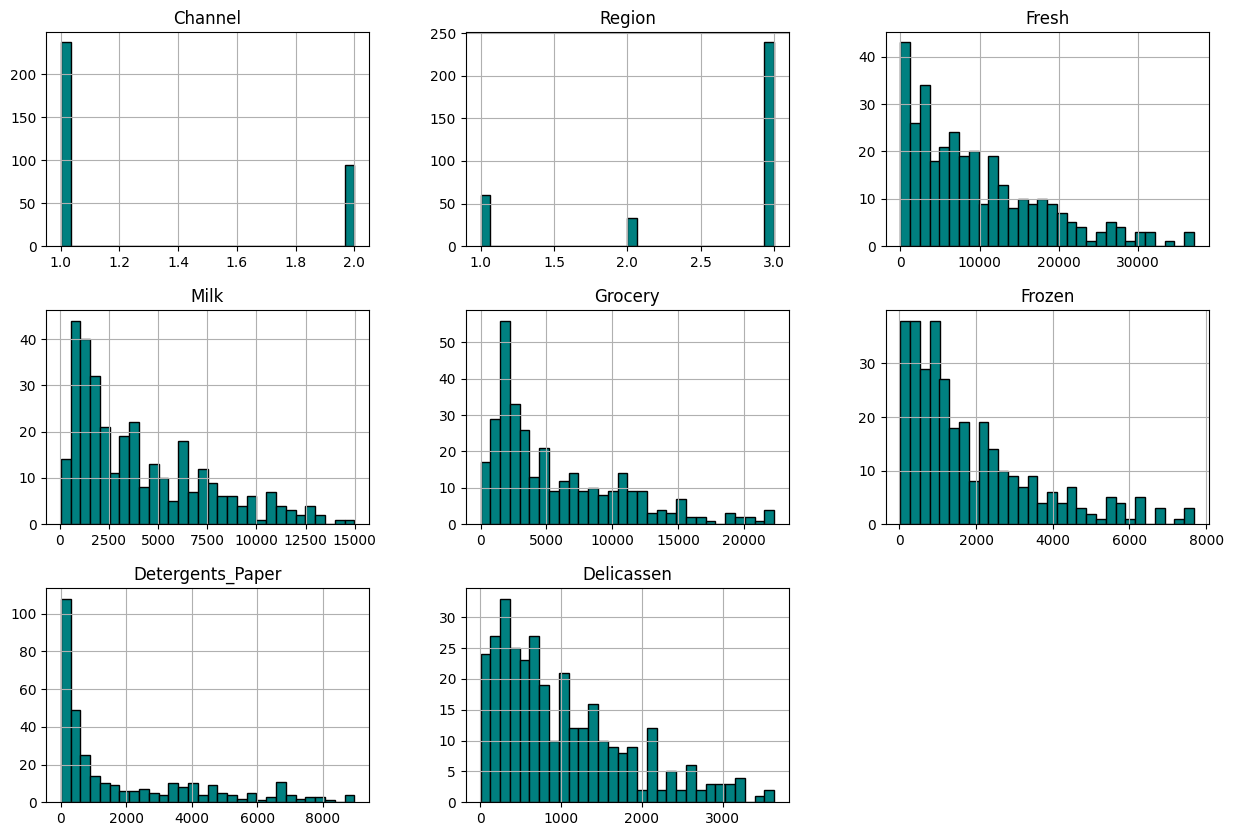

In [46]:
df_no_outliers.hist(bins=30, figsize=(15,10), layout=(3,3), color='teal', edgecolor='black')
plt.show()

# Part II - KMeans Clustering

The objective of the analysis is to group similar products together into clusters based on their attributes such as fresh, milk, grocery, frozen, detergents_paper, and delicatessen. To perform the k-means clustering analysis, you will need to pre-process the dataset, determine the optimal number of clusters, initialize the centroids, assign data points to clusters, update the centroids, and repeat until convergence.

In [28]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [47]:
# Standardize the data

features = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']
X = df_no_outliers[features]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

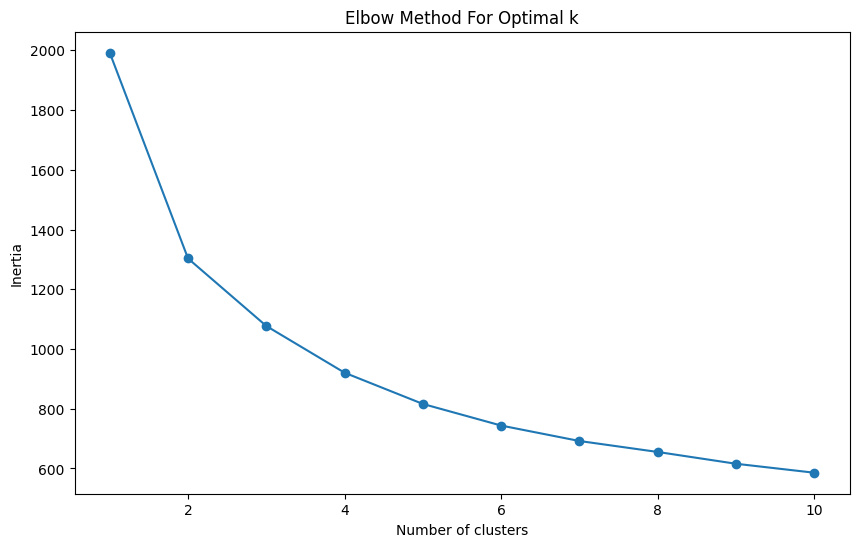

In [51]:
# Determine the optimal number of clusters using elbow method

inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

Based on the elbow method we'd choose either 3 or 4 for the optimal amount of clusters

In [60]:
# Performing kmeans with 4 clusters

optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, n_init=10, random_state=42)
kmeans.fit(X_scaled)

clusters = kmeans.labels_

# Add the cluster information to the original DataFrame
df_no_outliers['Cluster'] = clusters


In [61]:
# Viewing the mean values of each cluster
cluster_means = df_no_outliers.groupby('Cluster')[features].mean()
cluster_means


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Cluster,,,,,,
0,6902.914894,2556.226950,3344.602837,986.836879,846.617021,631.737589
1,5217.064103,8175.615385,12869.538462,1268.948718,5473.679487,1334.410256
2,11502.774648,2162.647887,2832.633803,4310.366197,621.760563,859.014085
3,23161.833333,5029.666667,6527.952381,1770.809524,1426.547619,1984.833333


- **Cluster 0:**
  - Above-average spending on 'Fresh'.
  - Below-average spending on 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', and 'Delicatessen'.
  - This cluster might represent smaller markets.

- **Cluster 1:**
  - Below-average spending on 'Fresh' and 'Frozen'.
  - High spending on 'Milk', 'Grocery', and 'Detergents_Paper', and above-average spending on 'Delicatessen'.
  - Likely to represent convenience stores that stock a range of grocery items and household goods.

- **Cluster 2:**
  - High spending on 'Fresh' and 'Frozen'.
  - Very low spending on 'Milk', 'Grocery','Detergents_Paper', and 'Delicatessen'.
  - This cluster could represent restaurants that emphasize fresh and frozen food.

- **Cluster 3:** 
  - Very high spending on 'Fresh'.
  - Moderate spending on 'Milk', 'Grocery', 'Detergents_Paper', and 'Delicatessen', and relatively low spending on 'Frozen'.


# Part III - Hierarchical Clustering 

Hierarchical clustering is a popular unsupervised machine learning algorithm that is used to identify patterns and group similar data points together in a hierarchy. The algorithm works by iteratively merging or splitting clusters based on a similarity measure until a dendrogram is formed.

To perform hierarchical clustering analysis, you will need to pre-process the dataset, determine the optimal number of clusters using techniques such as dendrogram.

In [65]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

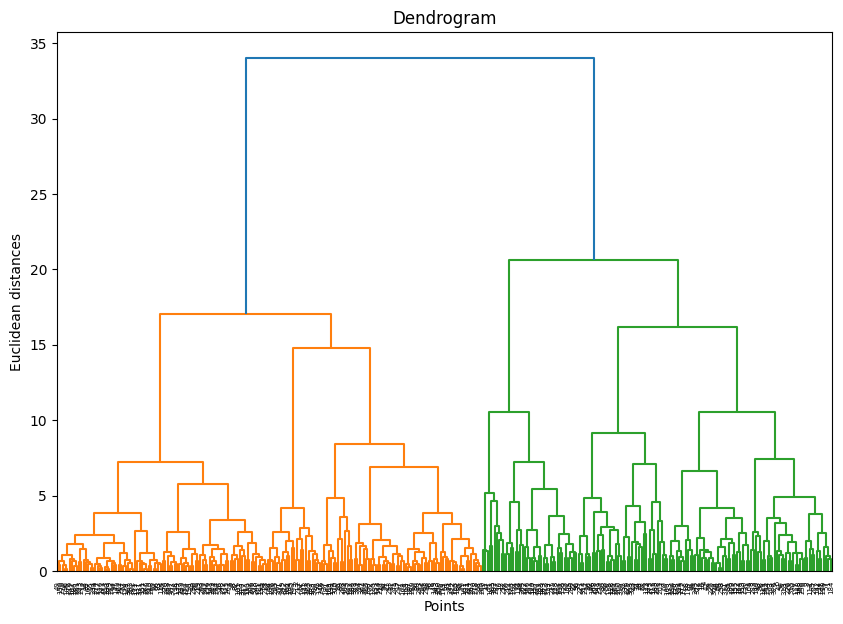

In [66]:
# Plot the dendrogram 

# Define function
def plot_dendrogram(X, method='ward'):
    plt.figure(figsize=(10, 7))  
    dendrogram = sch.dendrogram(sch.linkage(X_scaled, method=method))
    plt.title("Dendrogram")
    plt.ylabel("Euclidean distances")
    plt.xlabel('Points')
    plt.show()

plot_dendrogram(X_scaled)

Based on this dendrogram, we can identify 2 or even 3 main clusters depending on where the cutoff is distance is set at

# Part IV - PCA

In this section you are going to perform principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

In [67]:
from sklearn.decomposition import PCA

In [69]:
# Initializing PCA

pca = PCA(n_components=None)

X_scaled_pca = pca.fit(X_scaled)

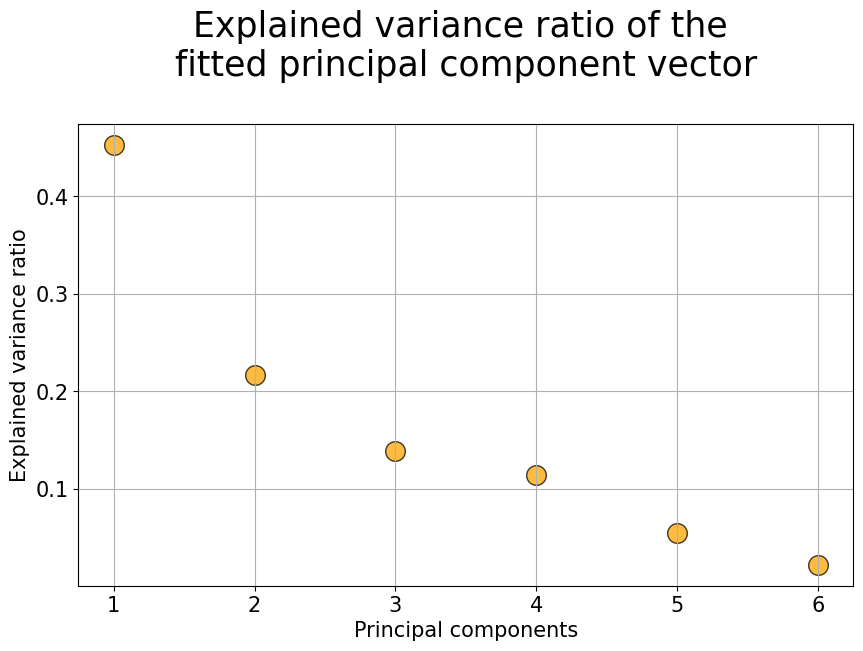

In [70]:
# Plot the explained variance ratio

plt.figure(figsize=(10,6))
plt.scatter(x=[i+1 for i in range(len(X_scaled_pca.explained_variance_ratio_))],
            y=X_scaled_pca.explained_variance_ratio_,
           s=200, alpha=0.75,c='orange',edgecolor='k')
plt.grid(True)
plt.title("Explained variance ratio of the \nfitted principal component vector\n",fontsize=25)
plt.xlabel("Principal components",fontsize=15)
plt.xticks([i+1 for i in range(len(X_scaled_pca.explained_variance_ratio_))],fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel("Explained variance ratio",fontsize=15)
plt.show()

In [71]:
pca.explained_variance_ratio_

array([0.45268311, 0.21638576, 0.13897372, 0.11463788, 0.05487702,
       0.02244251])

The first 4 components explain just about 90% of the variance ratio

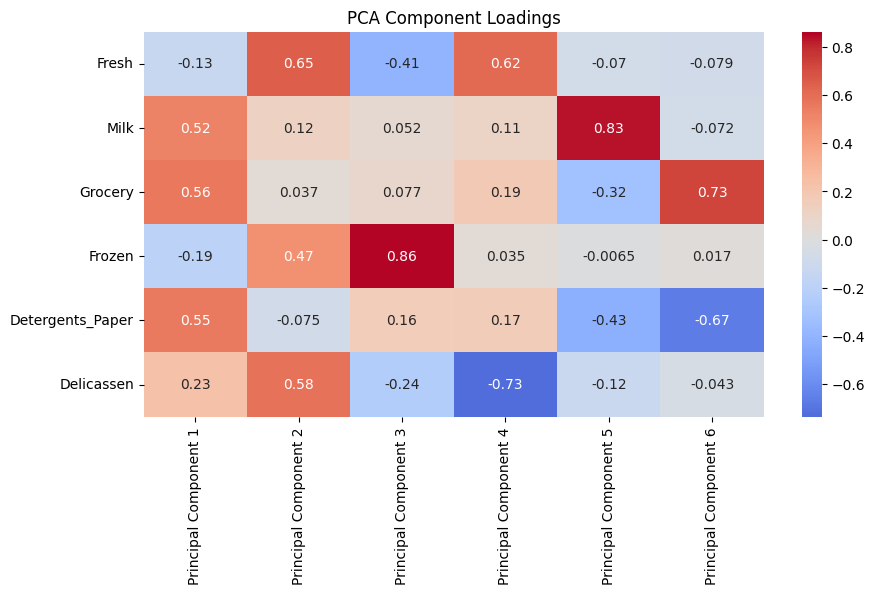

In [75]:
# Analyze principal components through visualization 

loadings = pca.components_
features = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']

# Create a dataframe of the loadings with features as rows and components as columns
loadings_df = pd.DataFrame(loadings.T, columns=[f'Principal Component {i}' for i in range(1, len(loadings) + 1)], index=features)

plt.figure(figsize=(10, 5))
sns.heatmap(loadings_df, annot=True, cmap='coolwarm', center=0)
plt.title('PCA Component Loadings')
plt.show()

Principal Component captures significant variance in customer spending on Milk, Grocery, and Detergents_Paper. This suggests that there is a type of customer who tends to purchase these items together.

Principal Component 2 is heavily influenced by spending on Fresh, Frozen, and Delicassen. This might indicate a different segment of customers, such as restaurants that specialize in fresh and frozen foods and require a variety of delicatessen items.


# Part V - Conclusion

From the model you developed and the exploratory data analysis (EDA) conducted, generate four bullet points as your findings.

- The exploratory data analysis indicated that product category distributions are skewed, revealing that most customers tend to spend modestly, while a small segment exhibits high expenditure
- The k-means clustering identified four customer segments: smaller markets with higher spending on fresh products, convenience stores with diverse grocery and household goods selections, restaurants focusing on fresh and frozen ingredients, and establishments with a moderate, balanced expenditure across most categories except frozen goods.
- Contrary to the elbow method, the hierarchical clustering method favours 3 clusters.
- The PCA analysis reveals two main spending patterns among customers: one that combines purchases of Milk, Grocery, and Detergents_Paper, likely reflecting everyday consumer needs, and another pattern focusing on Fresh, Frozen, and Delicatessen items, which may represent businesses like restaurants that prioritize a range of fresh and specialty foods.